<a href="https://www.kaggle.com/code/pologonz/studentperformance?scriptVersionId=96296484" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


### The dataset contains 1000 observations of highschool student grades in math, reading and writting
#### The dataset does not prominently show the timeframe, location or other datails of the observations
### This graphic analysis aims to show how different factors like gender, ethnicity and test preparation might correlate with grades

In [2]:
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### With substantially no exceptions, students with high scores in one subject also score high in other subjects (and low in one corresponds to low in other subjects)

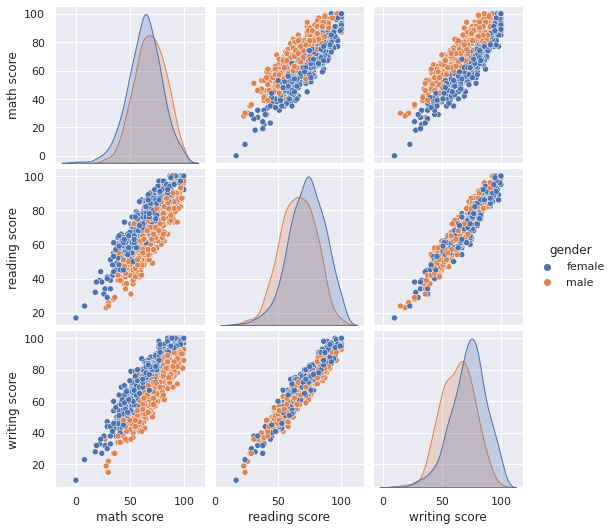

In [4]:
sns.set()
sns.pairplot(df, hue='gender', vars=['math score','reading score','writing score'])

### There seems to be a significan difference in scores for reduced price lunch students

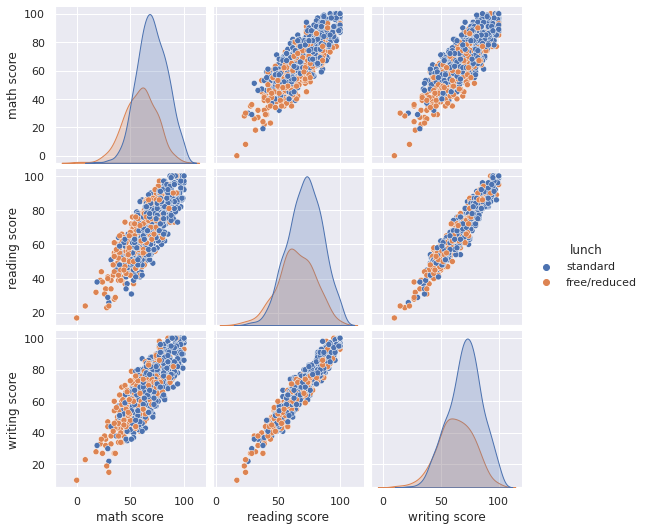

In [5]:
sns.pairplot(df, hue='lunch', vars=['math score','reading score','writing score'])

### Parental level of education does not seem to be a driver of scores

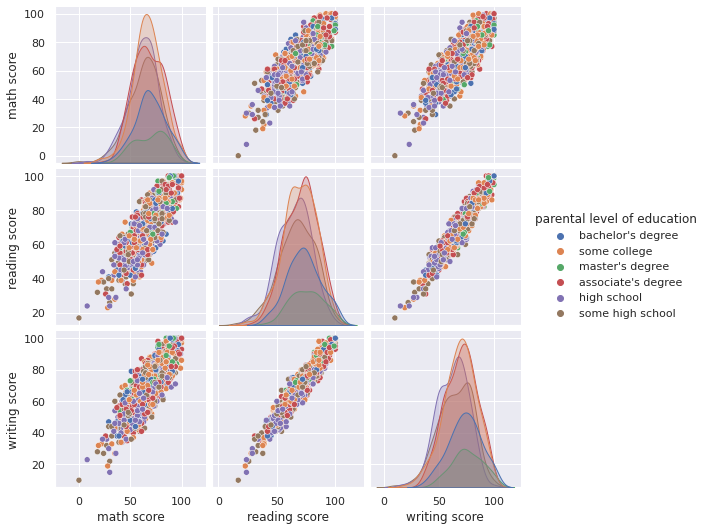

In [6]:
sns.pairplot(df, hue='parental level of education', vars=['math score','reading score','writing score'])

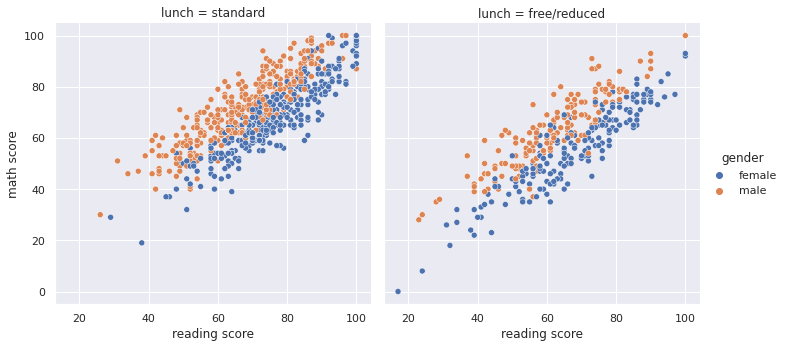

In [7]:
sns.relplot(
    data=df,
    x='reading score', y='math score', col="lunch",
    hue="gender"
)

### There does not seem to be a major difference among ethnic groups, other than group E skewing towards higher scores

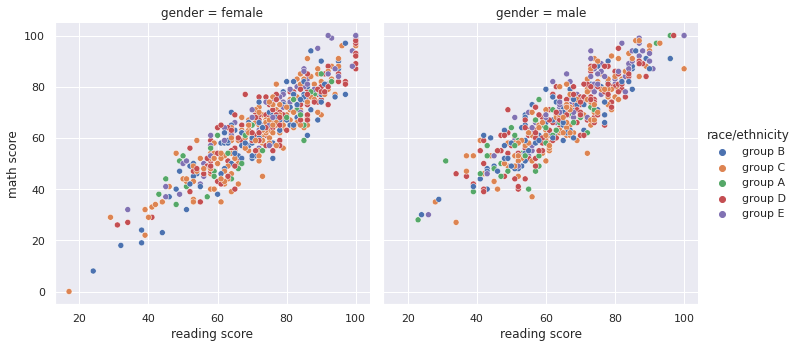

In [8]:
sns.relplot(
    data=df,
    x='reading score', y='math score', col="gender",
    hue="race/ethnicity"
)

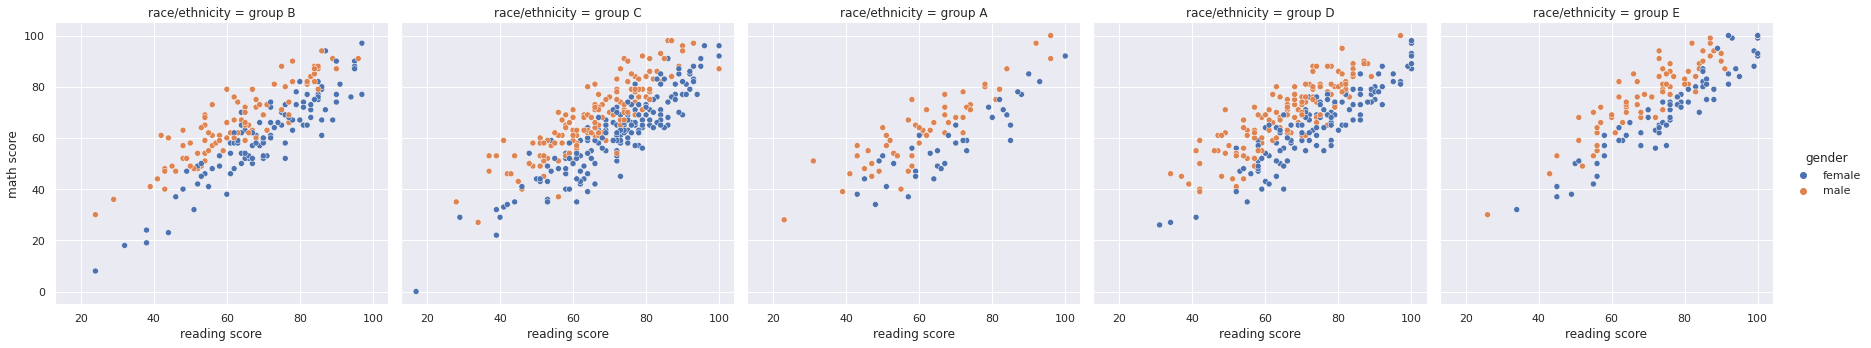

In [9]:
sns.relplot(
    data=df,
    x='reading score', y='math score', col="race/ethnicity",
    hue="gender"
)

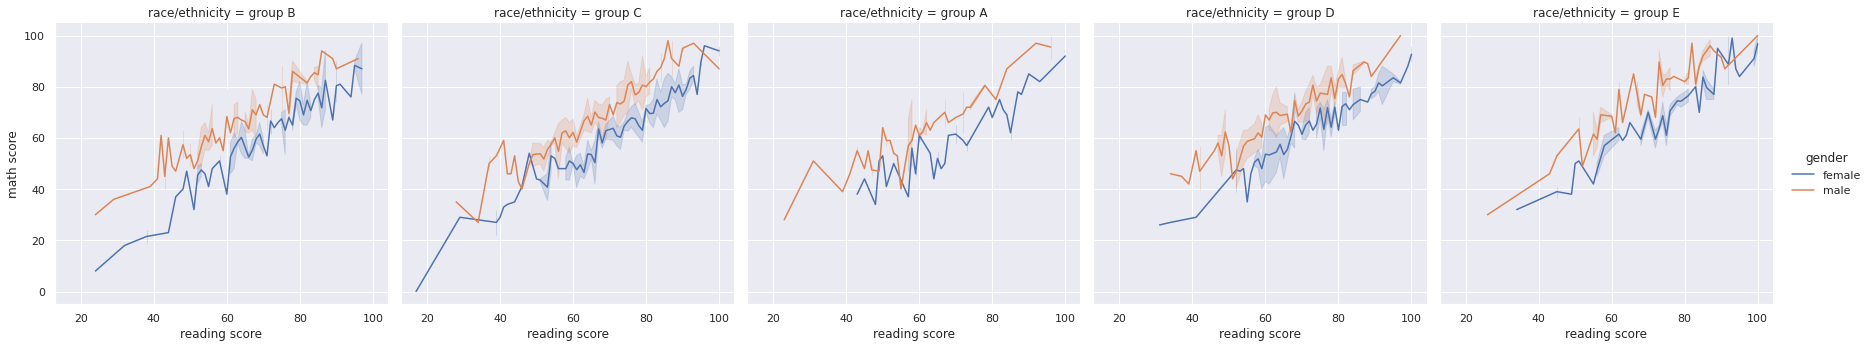

In [10]:
sns.relplot(
    data=df, kind='line',
    x='reading score', y='math score', col="race/ethnicity",
    hue="gender"
)

### Test preparation seems useful mostly for bottom scores

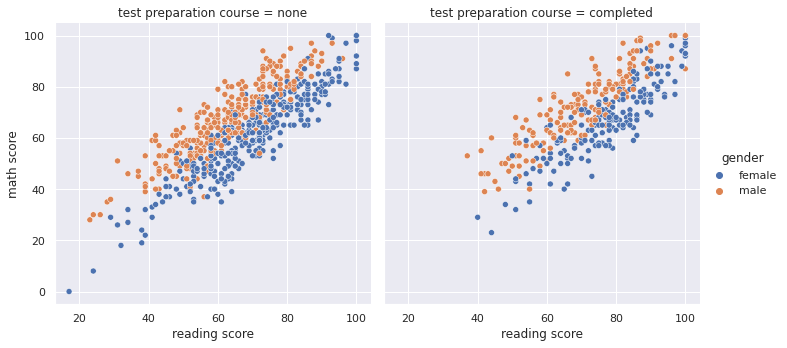

In [11]:
sns.relplot(
    data=df, 
    x='reading score', y='math score', col="test preparation course",
    hue="gender"
)

### A linear regression helps us visualize the difference between students on regular vs free/reduced lunch

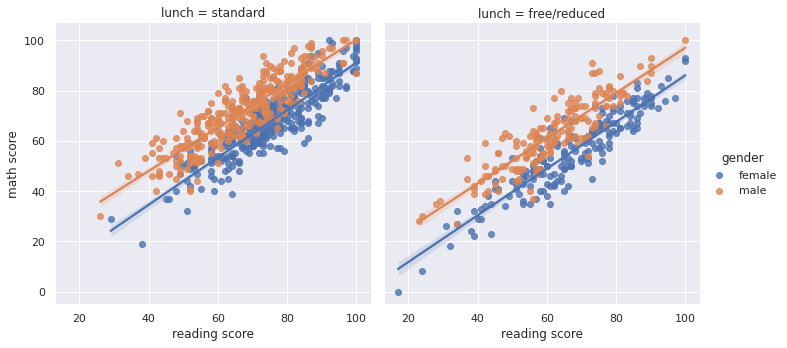

In [12]:
sns.lmplot(data=df, x="reading score", y="math score", col="lunch", hue="gender")

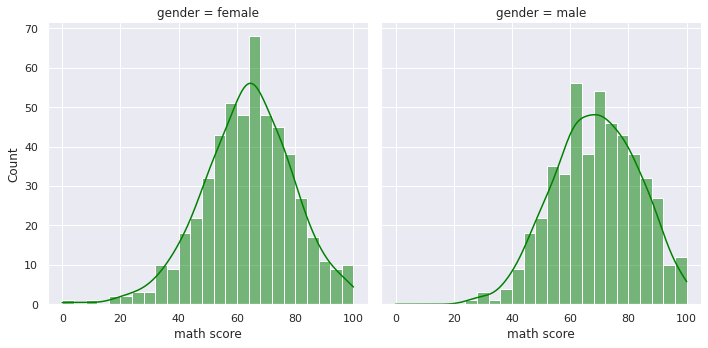

In [13]:
sns.displot(data=df, x="math score", col="gender", kde=True, color='green')

### A histogram shows there might be another difference among ethnic groups, in addition to group E skewing towards higher scores, group A seems to skew toward middle to low scores

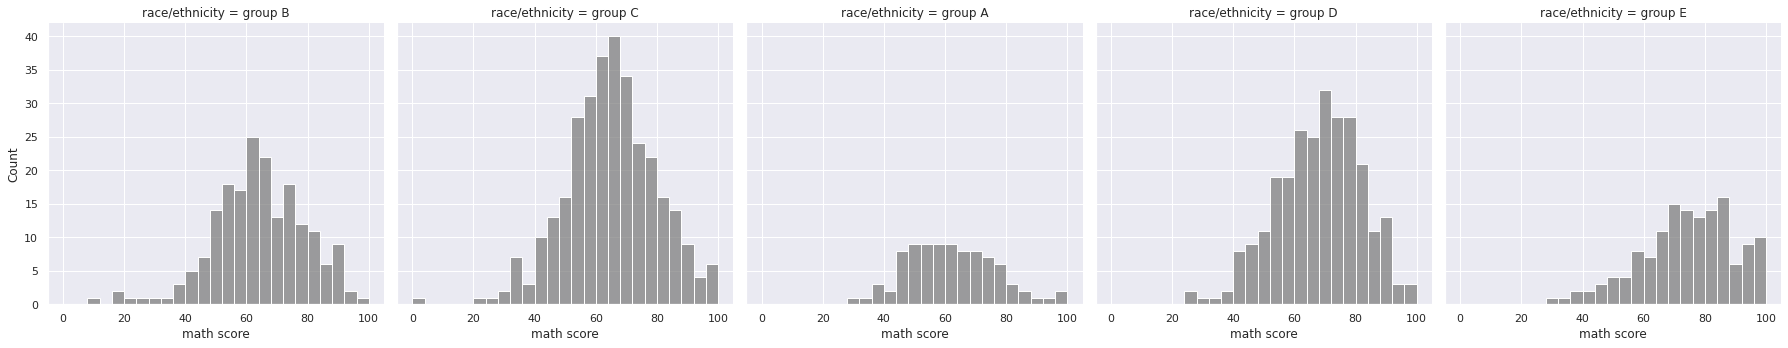

In [14]:
sns.displot(data=df, x="math score", col="race/ethnicity", color='grey')

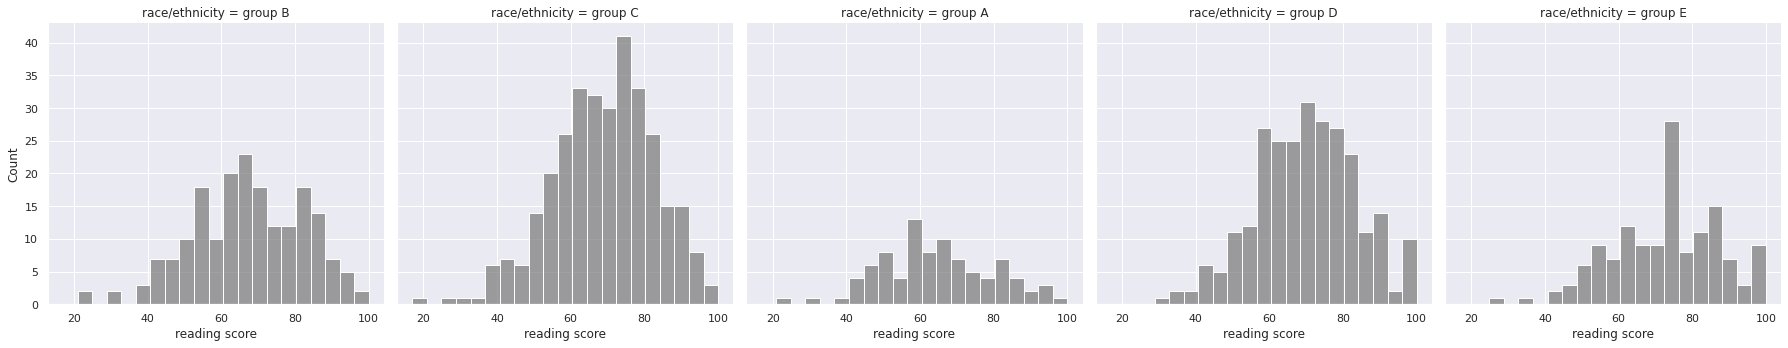

In [15]:
sns.displot(data=df, x="reading score", col="race/ethnicity", color='grey')

### The histograms below confirm our initial observations about the muted effect of parental education level on scores

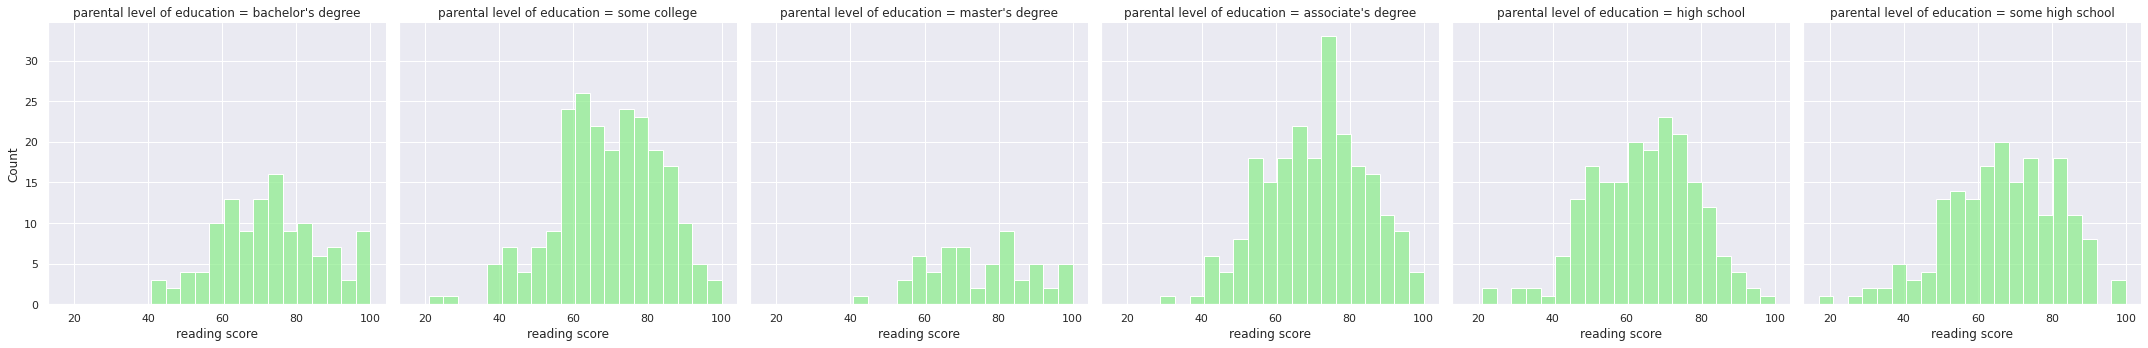

In [16]:
sns.displot(data=df, x="reading score", col="parental level of education", color='lightgreen')

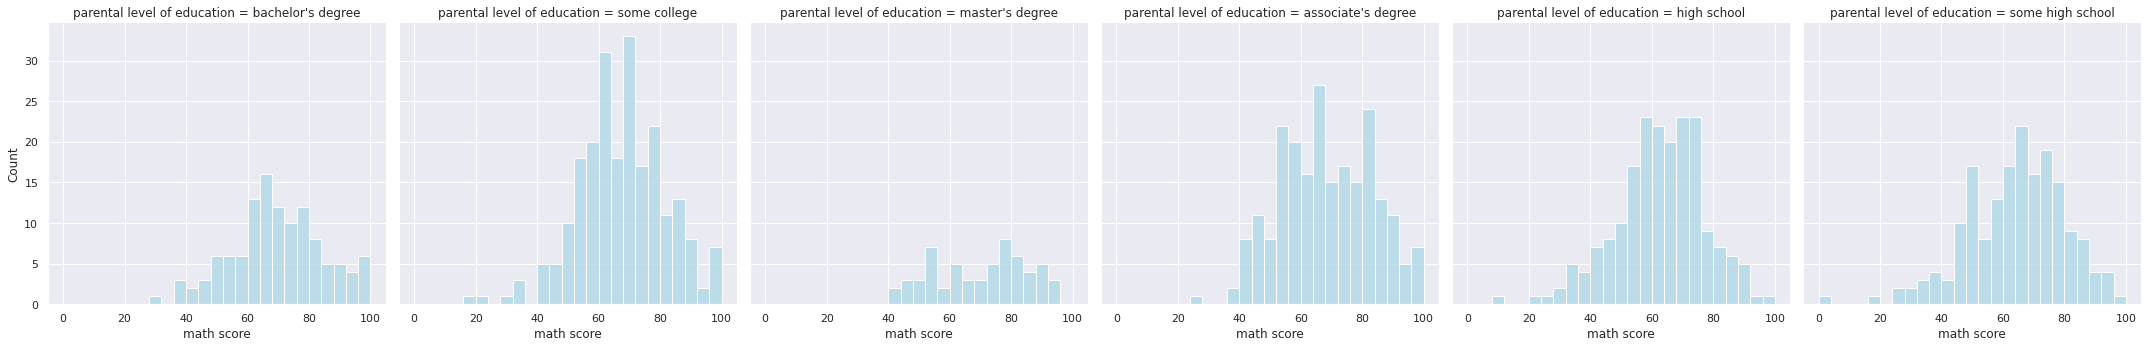

In [17]:
sns.displot(data=df, x="math score", col="parental level of education", color='lightblue')